## Scraping Reddit and posting to Pandas
inspiration for this notebook:
https://recycledrobot.co.uk/words/?web-scraping

quick tutorial: how to build a table with plotly.
https://plotly.com/python/table/

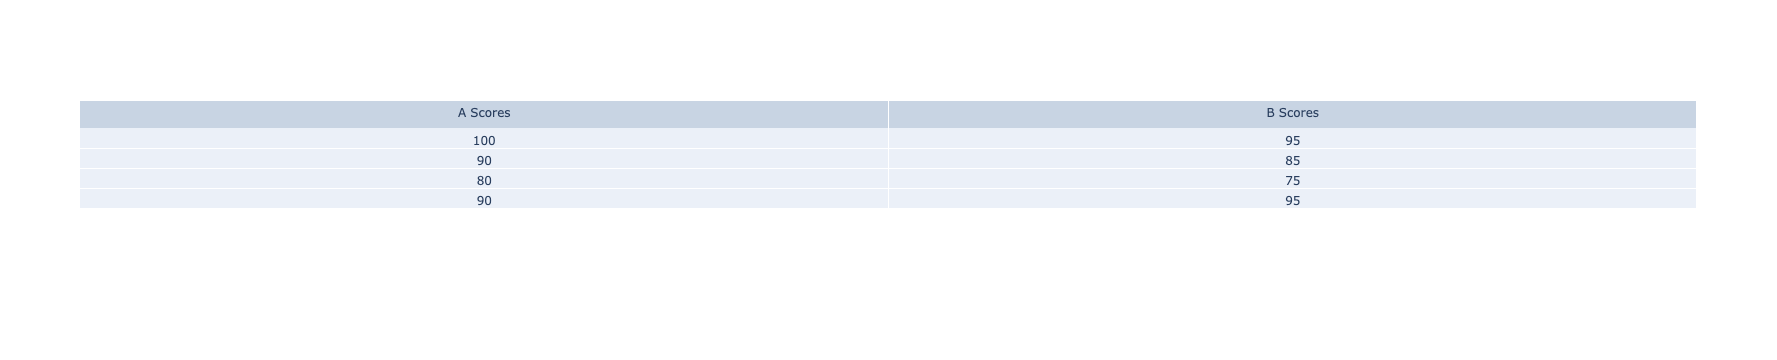

In [2]:

import plotly.graph_objects as go

data=go.Table(header=dict(values=['A Scores', 'B Scores']),
                 cells=dict(values=[[100, 90, 80, 90], [95, 85, 75, 95]]))
                     
fig = go.Figure([data])
fig

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from bs4 import BeautifulSoup
from requests import get

In [3]:
# define a scraper function
def lovely_soup(url):
    r = requests.get(url, headers = {'User-agent': 'Agent_Smith'})
    return BeautifulSoup(r.text, 'lxml')

In [4]:
# apply the function to our reddit source
url = 'https://old.reddit.com/r/AskReddit/'
soup = lovely_soup(url)
# note: you can also try this one
# url = 'https://old.reddit.com/r/Showerthoughts?sort=top&t=week'

In [5]:
# create a list of titles
titles = soup.findAll('p', {'class': 'title'})
titleslist=[]
for title in titles:
    titleslist.append(title.text)

In [6]:
# create a list of dates
dates = soup.findAll('time', {'class':"live-timestamp"})
dateslist=[]
for date in dates:
    output = str(date).split('title="')[1].split('2020')[0]
    dateslist.append(output)

In [7]:
# convert the two lists into a pandas dataframe
df_dict={'date':dateslist, 'post':titleslist}
working_df = pd.DataFrame(df_dict)
pd.set_option('display.max_colwidth', 200)
working_df['date'] = working_df['date'].str.strip()

### Clean-up

In [8]:
# write a function to clean up the post

def clean_that_post(row):
    x = row.split(' (self.AskReddit)')
    return x[0]

# test the function
print(working_df.loc[0,'post'])
print(clean_that_post(working_df.loc[0,'post']))

What improved your quality of life so much, you wish you did it sooner? (self.AskReddit)
What improved your quality of life so much, you wish you did it sooner?


In [9]:
# apply the function
working_df['post']=working_df['post'].apply(clean_that_post)
working_df.head(3)

,date,post
0,"Wed Jan 12 00:23:10 2022 UTC"">14 hours ago</time>","What improved your quality of life so much, you wish you did it sooner?"
1,"Wed Jan 12 02:41:33 2022 UTC"">12 hours ago</time>","What is something you SWEAR you saw, but have no proof of?"
2,"Tue Jan 11 19:07:41 2022 UTC"">20 hours ago</time>",What do you miss the most from pre-covid?


In [10]:
# write a function to clean up the date
def parse_that_date(row):
    x = row.split(' ')[1:]
    y = ' '.join(x)
    z = '2020 '+ y
    return z[:20]

# test the function
parse_that_date(working_df.iloc[0,0])

'2020 Jan 12 00:23:10'

In [11]:
# apply the date parsing function and sort the dataframe
working_df['cleandate']=working_df['date'].apply(parse_that_date)
working_df['UTC_date'] = pd.to_datetime(working_df['cleandate'])
working_df.sort_values('UTC_date', inplace=True, ascending=False)

In [12]:
# split into 2 date/time variables
working_df['date']=working_df['UTC_date'].dt.date
working_df['time']=working_df['UTC_date'].dt.time
working_df.head()

,date,post,cleandate,UTC_date,time
24,2020-01-12,Why should a person be proud of being X nationality if he did not have any influence on that?,2020 Jan 12 14:39:32,2020-01-12 14:39:32,14:39:32
22,2020-01-12,What are the biggest signs of a mid-life crisis?,2020 Jan 12 14:21:38,2020-01-12 14:21:38,14:21:38
21,2020-01-12,What’s your paranormal experience?,2020 Jan 12 13:47:23,2020-01-12 13:47:23,13:47:23
13,2020-01-12,what is a strong indicator that someone is dumb?,2020 Jan 12 13:44:52,2020-01-12 13:44:52,13:44:52
19,2020-01-12,What is something you absolutely DO NOT recommend ?,2020 Jan 12 13:32:11,2020-01-12 13:32:11,13:32:11


### Final DF

In [13]:
final_df = working_df[['date', 'time', 'post']].copy()
final_df.head()

,date,time,post
24,2020-01-12,14:39:32,Why should a person be proud of being X nationality if he did not have any influence on that?
22,2020-01-12,14:21:38,What are the biggest signs of a mid-life crisis?
21,2020-01-12,13:47:23,What’s your paranormal experience?
13,2020-01-12,13:44:52,what is a strong indicator that someone is dumb?
19,2020-01-12,13:32:11,What is something you absolutely DO NOT recommend ?


In [14]:
# write pandas df as html file 
# html = final_df.to_html(index=False) 
# text_file = open("docs/static/redditposts.html", "w") 
# text_file.write(html) 
# text_file.close() 

In [26]:
final_df.columns

Index(['date', 'time', 'post'], dtype='object')

In [15]:
data=go.Table(columnwidth = [200,200,1000],
                header=dict(values=final_df.columns, align=['left']),
                cells=dict(align=['left'],
                           values=[final_df['date'], 
                                   final_df['time'], 
                                   final_df['post'].values])
             )

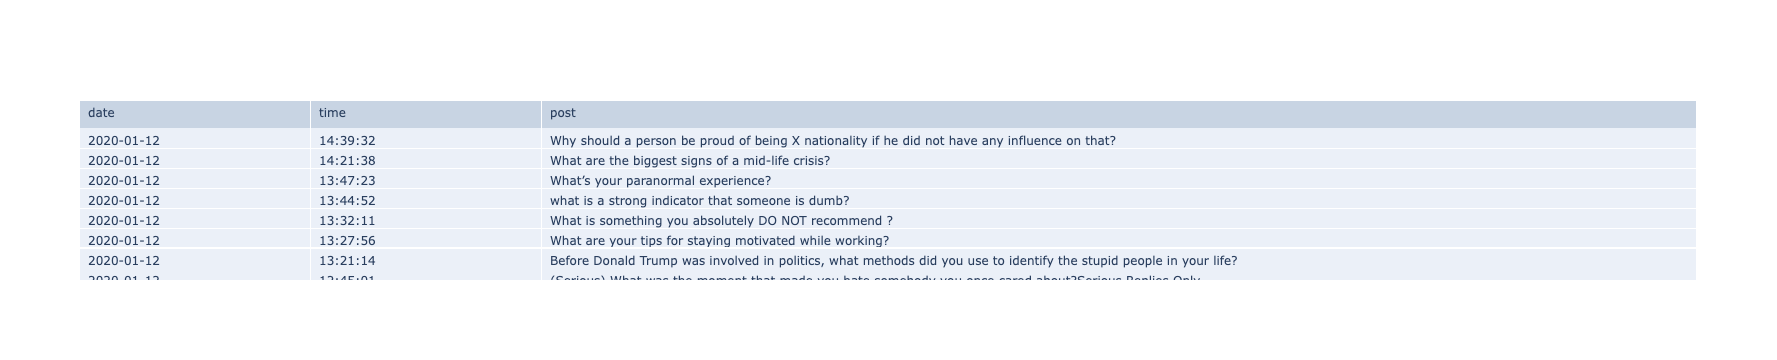

In [16]:
fig = go.Figure([data])
fig

In [18]:
# save as html
fig.write_html('table.html')